<a href="https://colab.research.google.com/github/RoadoneP/Machine_learning/blob/main/data_analysis_for_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data_Cleanup**

In [1]:
import numpy as np # 수치 연산
import pandas as pd # 데이터생성을 위한 라이브러리

# 데이터 시각화에 필요한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

#
import missingno as msno

#warning 무시
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_heart=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df_heart.shape

(303, 14)

In [7]:
#null값 확인 null값 없음
for col in df_heart.columns:
  msg='column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col,100 * (df_heart[col].isnull().sum()/ df_heart[col].shape[0]))
  print(msg)

column:        age	 Percent of Nan value: 0.00%
column:        sex	 Percent of Nan value: 0.00%
column:         cp	 Percent of Nan value: 0.00%
column:   trestbps	 Percent of Nan value: 0.00%
column:       chol	 Percent of Nan value: 0.00%
column:        fbs	 Percent of Nan value: 0.00%
column:    restecg	 Percent of Nan value: 0.00%
column:    thalach	 Percent of Nan value: 0.00%
column:      exang	 Percent of Nan value: 0.00%
column:    oldpeak	 Percent of Nan value: 0.00%
column:      slope	 Percent of Nan value: 0.00%
column:         ca	 Percent of Nan value: 0.00%
column:       thal	 Percent of Nan value: 0.00%
column:     target	 Percent of Nan value: 0.00%


<function matplotlib.pyplot.show>

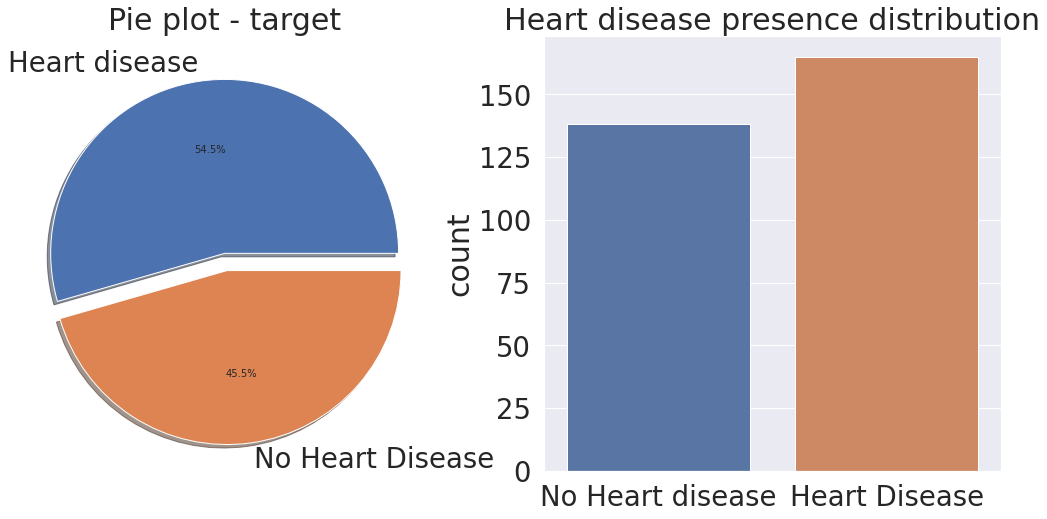

In [8]:
f, ax=plt.subplots(1,2,figsize=(18,8))

df_heart['target'].value_counts().plot.pie(explode=[0,0.1],labels=["Heart disease",'No Heart Disease'],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - target')
ax[0].set_ylabel('')
f=sns.countplot(x='target',data=df_heart)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(["No Heart disease",'Heart Disease'])
plt.xlabel("")
plt.show

##**문제1: cp(가슴 통증 유형)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

In [9]:
#Group 수
df_heart[['cp','target']].groupby(['cp']).count()

,target
cp,
0,143
1,50
2,87
3,23


In [10]:
#cp 와 target cp 0 의 경우는 39명이 심장병 진단
pd.crosstab(df_heart['cp'],df_heart['target'],margins=True).style.background_gradient(cmap='summer')

target,0,1,All
cp,,,
0,104,39,143
1,9,41,50
2,18,69,87
3,7,16,23
All,138,165,303


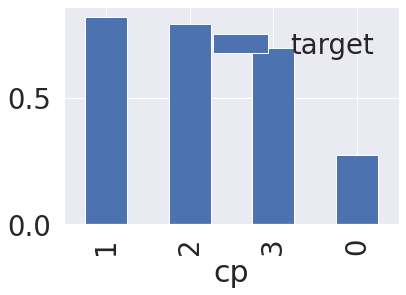

In [11]:
# cp는 1번 2번 3번 0번 순서로 집단내 심장병 진단 환자 비율이 높음을 알 수 있음
df_heart[['cp','target']].groupby(['cp']).mean().sort_values(by='target',ascending=False).plot.bar()

<function matplotlib.pyplot.show>

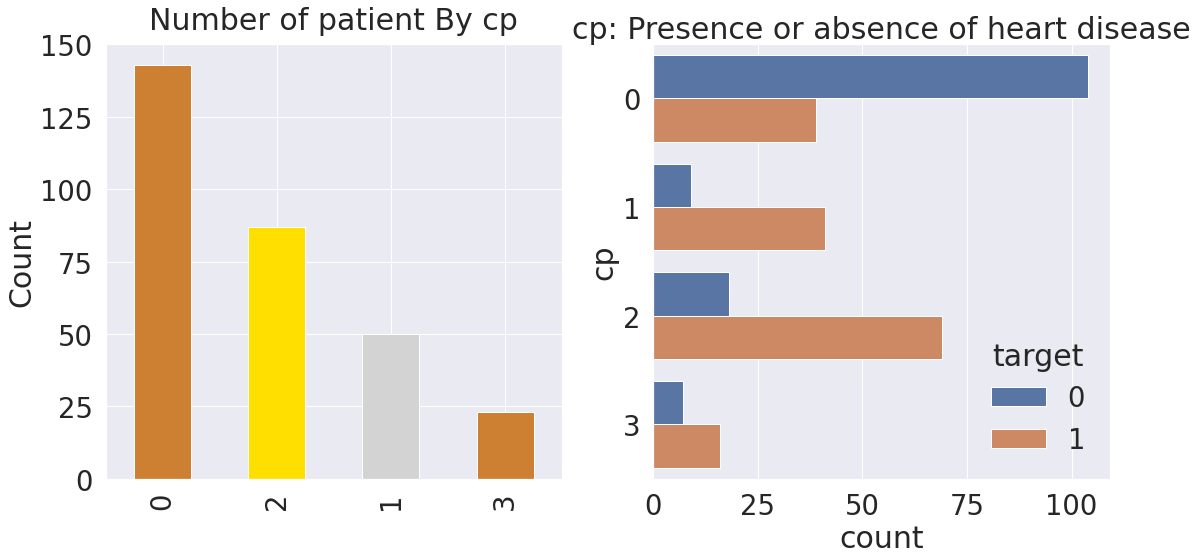

In [12]:
#하지만 환자수로 보았을 때는 2번 1번 0번 3번 순서로 환자수가 많음
y_position=1.02
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart['cp'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0]) 
ax[0].set_title('Number of patient By cp', y=y_position) 
ax[0].set_ylabel('Count') 
sns.countplot(y='cp',hue='target',data=df_heart)
ax[1].set_title('cp: Presence or absence of heart disease')
plt.show

**문제1의 결론**
1.   cp는 1번 2번 3번 0번 순서로 집단내 심장병 진단 환자 비율이 높음을 알 수 있음
2.   하지만 환자수로 보았을 때는 2번 1번 0번 3번 순서로 환자수가 많음

0 – 전형적인 협심증
1 – 비전형적인 협심증
2 – 비협심증 통증
3- 증상 없음

##**문제2: sex(성별)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

<function matplotlib.pyplot.show>

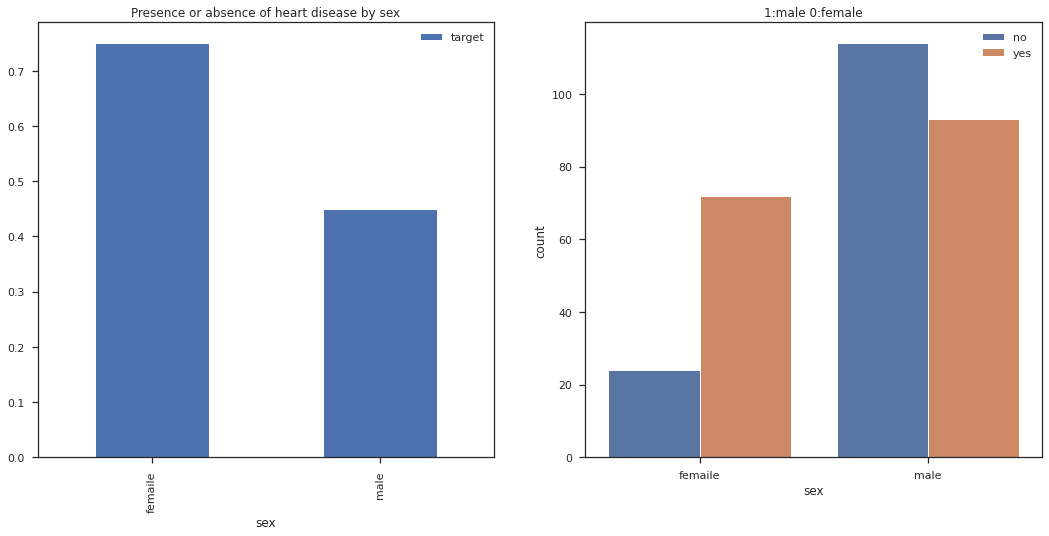

In [21]:
#여자가 비율적으로 심장병환자가 더 많다. 하지만 수적으로는 남자 심장병 환자가 더 많다.
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart[['sex','target']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Presence or absence of heart disease by sex')
sns.countplot('sex',hue='target',data=df_heart,ax=ax[1])
plt.legend(['no','yes'])
ax[1].set_title("1:male 0:female")
ax[0].set_xticklabels(['femaile','male'])
ax[1].set_xticklabels(['femaile','male'])
plt.show

In [22]:
#남자 44퍼 여자는 75퍼
df_heart[['sex','target']].groupby(['sex'], as_index=False).mean()

,sex,target
0,0,0.750000
1,1,0.449275


**문제2의 결론**


1.   여자가 비율적으로 심장병환자가 더 많다. 하지만 수적으로는 남자 심장병 환자가 더 많다
2.   남자 44퍼 여자는 75퍼



##**문제3: exang(협심즘 유발 운동)과 target(심잠병 유무) 사이의 관계를 자유롭게 분석하시오.**

<function matplotlib.pyplot.show>

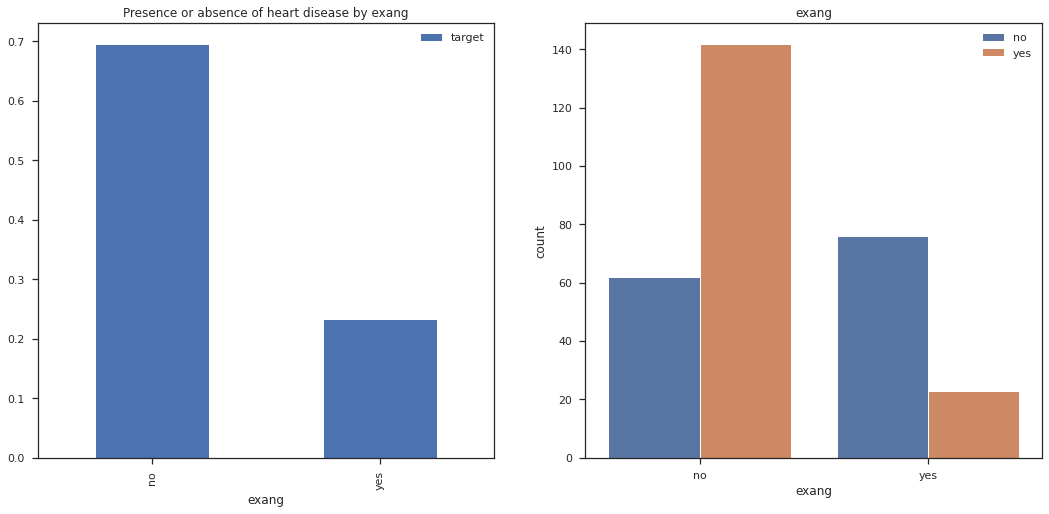

In [23]:
#협심증 유발운동이 없는 사람이 심장병 유무 비율이 높고 실제로도 수적으로도 많다.
f,ax=plt.subplots(1,2,figsize=(18,8))
df_heart[['exang','target']].groupby(['exang']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Presence or absence of heart disease by exang')
sns.countplot('exang',hue='target',data=df_heart,ax=ax[1])
plt.legend(['no','yes'])
ax[1].set_title("exang")
ax[0].set_xticklabels(['no','yes'])
ax[1].set_xticklabels(['no','yes'])
plt.show

In [24]:
df_heart[['exang','target']].groupby(['exang'], as_index=False).mean()

,exang,target
0,0,0.696078
1,1,0.232323


**문제3의 결론**


1.   #협심증 유발운동이 없는 사람이 심장병 유무 비율이 높고 실제로도 수적으로도 많다.
2.   no 69퍼 yes 23퍼



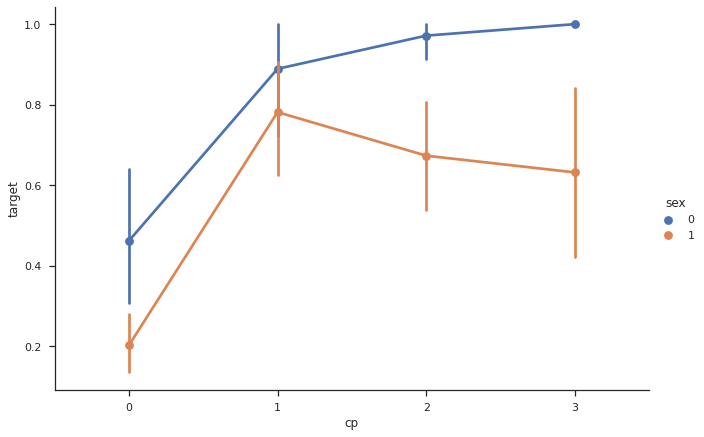

In [25]:
sns.factorplot('cp','target',hue='sex',data=df_heart,size=6,aspect=1.5)

##**별도 Sex와 target,cp 간 관계와 히트맵 등**

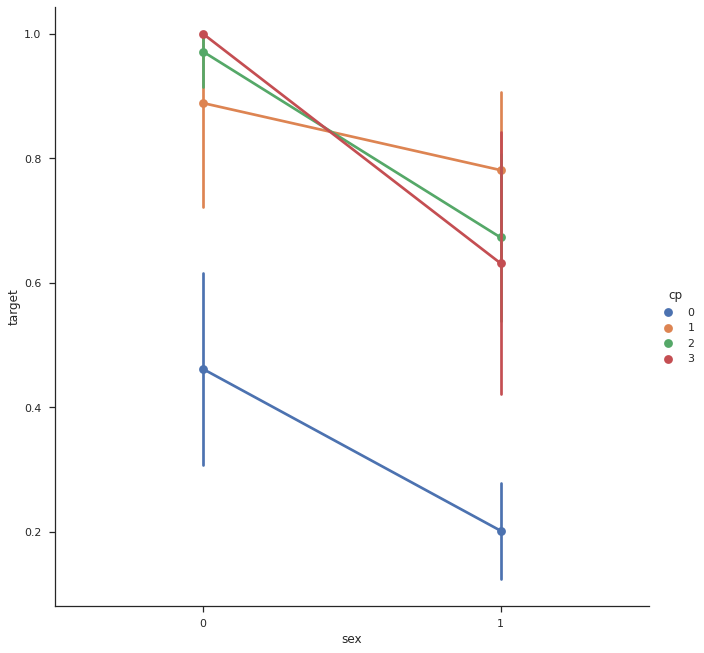

In [26]:
sns.factorplot('sex','target',hue='cp',data=df_heart,saturation=5,size=9,aspect=1)

[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'sex'),
 Text(2.5, 0, 'cp'),
 Text(3.5, 0, 'trestbps'),
 Text(4.5, 0, 'chol'),
 Text(5.5, 0, 'fbs'),
 Text(6.5, 0, 'restecg'),
 Text(7.5, 0, 'thalach'),
 Text(8.5, 0, 'exang'),
 Text(9.5, 0, 'oldpeak'),
 Text(10.5, 0, 'slope'),
 Text(11.5, 0, 'ca'),
 Text(12.5, 0, 'thal'),
 Text(13.5, 0, 'target')]

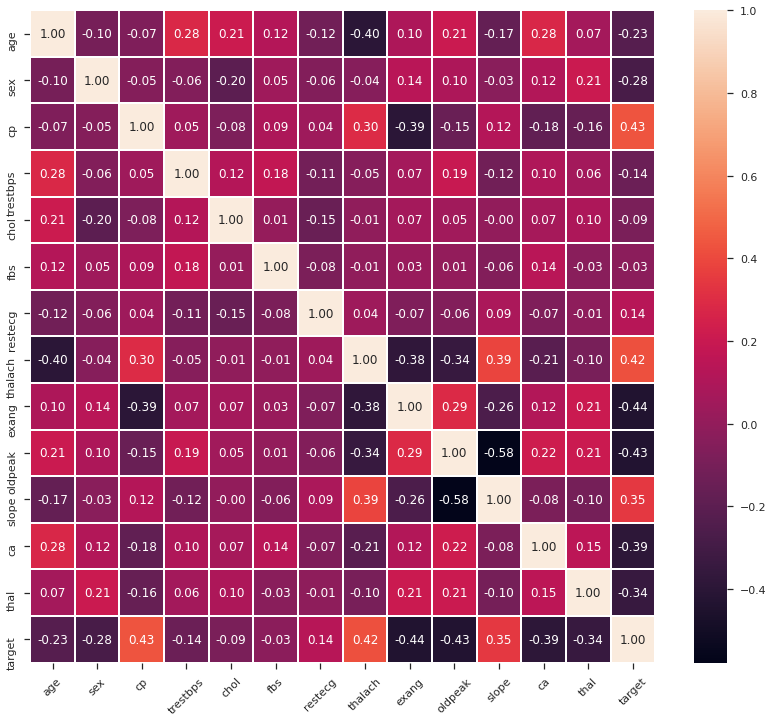

In [27]:
sns.set(style='ticks',color_codes=True)
plt.figure(figsize=(14,12))
heat_map=sns.heatmap(df_heart.corr(method='pearson'),annot=True,fmt='.2f',linewidths=1)
heat_map.set_xticklabels(heat_map.get_xticklabels(),rotation=45)

[Text(0, 0.5, 'total'), Text(0.5, 0, 'age')]

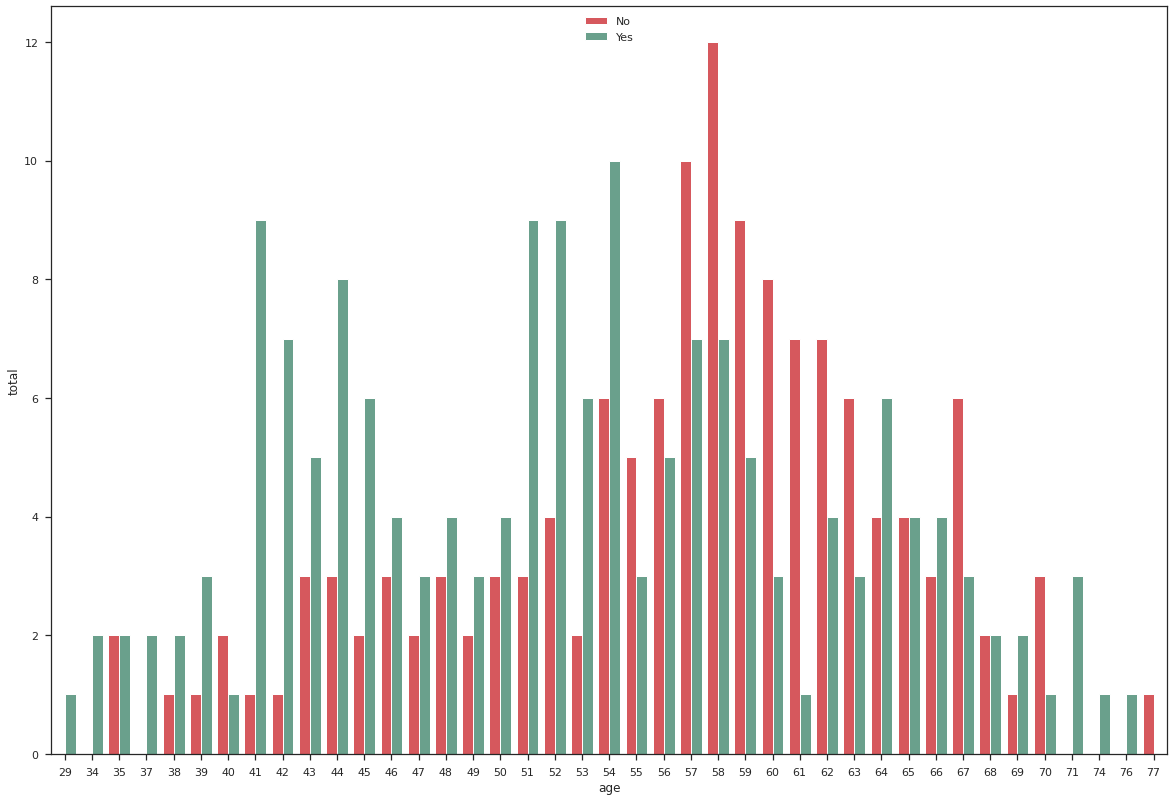

In [28]:
df_heart['age']=df_heart['age'].apply(lambda h: round(h))

fig=plt.figure(figsize=(20, 5.5/8*20))
ax = sns.countplot(x='age', 
                   hue='target', 
                   palette={0:'#EB434A', 1:'#61A98F'}, 
                   data=df_heart)
plt.legend(['No','Yes'])
ax.set(xlabel='age', ylabel='total')
